In [5]:
# Step b: Load the dataset into a Pandas DataFrame
import pandas as pd

# Load Excel file
file_path = "sample-data-10mins.xlsx"  # Replace with your actual file path if different
xls = pd.ExcelFile(file_path)

# Check sheet names
print("Available sheets:", xls.sheet_names)

# Load the 'data' sheet
df = xls.parse('data')

# Step c: Exploratory Data Analysis (EDA)
# Dataset structure and dimensions
print("Shape of dataset:", df.shape)

# Data types and initial overview
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Step d: Handle missing values and clean the data
# No missing values were found, but we'll standardize column names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Optional: convert date to datetime format (already done in this case, but here’s how)
df['date'] = pd.to_datetime(df['date'])

# Step e: Export the cleaned dataset
cleaned_file_path = "cleaned_sales_data.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data exported to: {cleaned_file_path}")


Available sheets: ['data']
Shape of dataset: (1094, 6)

Data types:
 Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                    int64
Boxes Shipped             int64
dtype: object

Summary statistics:
          Sales Person    Country         Product  \
count            1094       1094            1094   
unique             25          6              22   
top     Kelci Walkden  Australia  50% Dark Bites   
freq               54        205              60   
mean              NaN        NaN             NaN   
min               NaN        NaN             NaN   
25%               NaN        NaN             NaN   
50%               NaN        NaN             NaN   
75%               NaN        NaN             NaN   
max               NaN        NaN             NaN   
std               NaN        NaN             NaN   

                                 Date        Amount  Boxes Shipped  
count    

In [6]:
# Required libraries
import pandas as pd
import numpy as np
from scipy import stats

# Load the cleaned dataset (if not already loaded)
df = pd.read_csv("cleaned_sales_data.csv")  # Skip if 'df' is already in memory

# Columns to analyze
numerical_cols = ['amount', 'boxes_shipped']

# Dictionary to store EDA results
eda_stats = {}

# Loop through each numerical column
for col in numerical_cols:
    col_data = df[col]
    eda_stats[col] = {
        'mean': col_data.mean(),
        'median': col_data.median(),
        'mode': col_data.mode().iloc[0] if not col_data.mode().empty else None,
        'std_dev': col_data.std(),
        'min': col_data.min(),
        'max': col_data.max(),
        '25%': col_data.quantile(0.25),
        '50%': col_data.quantile(0.50),
        '75%': col_data.quantile(0.75),
        'iqr': col_data.quantile(0.75) - col_data.quantile(0.25),
    }

# Print descriptive statistics
print("\n=== Descriptive Statistics ===")
for col, stats_dict in eda_stats.items():
    print(f"\n--- {col.upper()} ---")
    for stat_name, value in stats_dict.items():
        print(f"{stat_name}: {value}")

# Outlier detection using IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers[col] = {
        'num_outliers': outlier_rows.shape[0],
        'outlier_indices': outlier_rows.index.tolist()
    }

# Print outlier information
print("\n=== Outliers Detected ===")
for col, outlier_info in outliers.items():
    print(f"\n--- {col.upper()} ---")
    print(f"Number of outliers: {outlier_info['num_outliers']}")
    print(f"Indices of outliers: {outlier_info['outlier_indices']}")



=== Descriptive Statistics ===

--- AMOUNT ---
mean: 5652.308043875685
median: 4868.5
mode: 2317
std_dev: 4102.442014053661
min: 7
max: 22050
25%: 2390.5
50%: 4868.5
75%: 8027.25
iqr: 5636.75

--- BOXES_SHIPPED ---
mean: 161.7979890310786
median: 135.0
mode: 24
std_dev: 121.54414540536328
min: 1
max: 709
25%: 70.0
50%: 135.0
75%: 228.75
iqr: 158.75

=== Outliers Detected ===

--- AMOUNT ---
Number of outliers: 16
Indices of outliers: [57, 66, 119, 135, 212, 257, 372, 434, 543, 589, 609, 751, 806, 891, 949, 1008]

--- BOXES_SHIPPED ---
Number of outliers: 26
Indices of outliers: [39, 97, 109, 121, 150, 171, 188, 340, 445, 458, 463, 584, 665, 672, 692, 730, 765, 769, 823, 852, 862, 865, 875, 978, 1028, 1070]


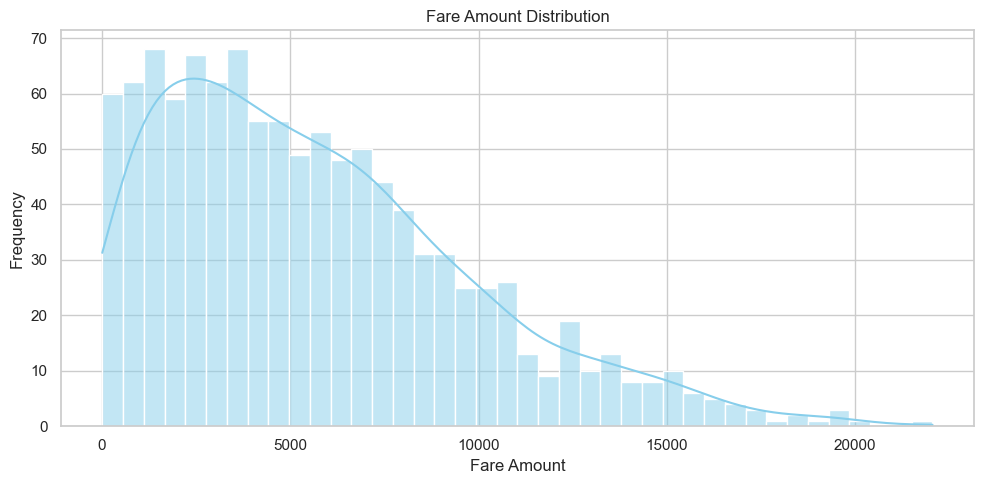

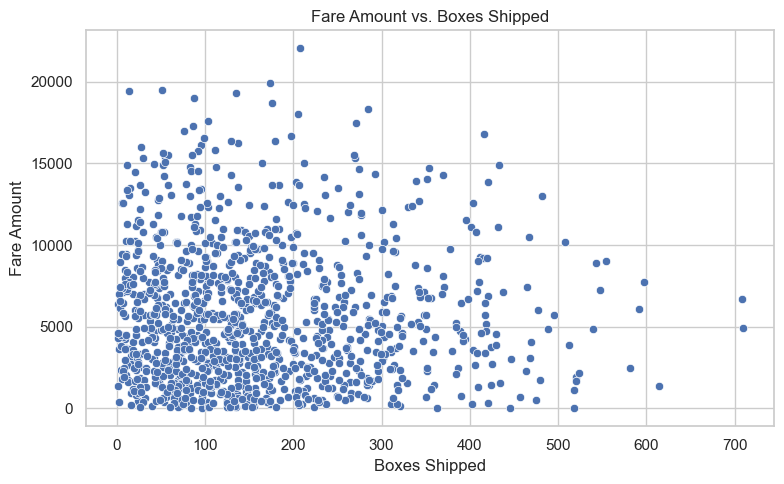

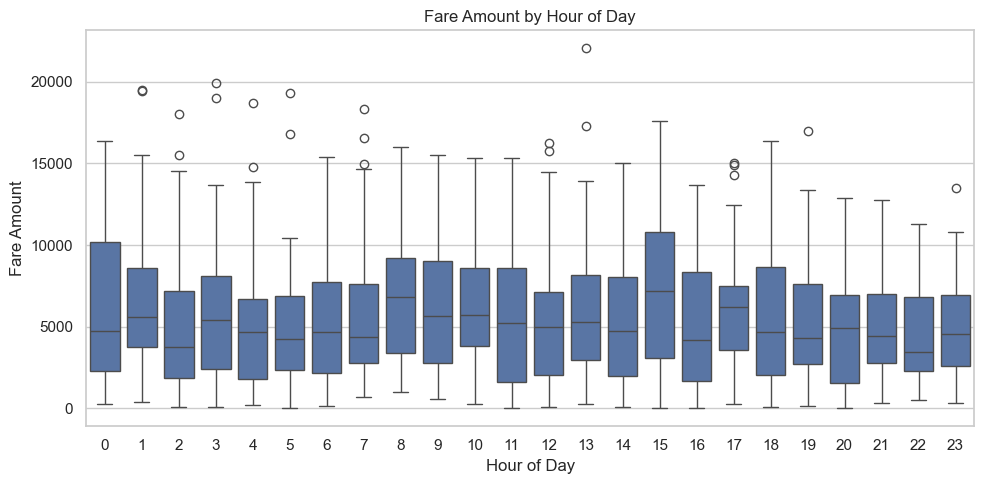

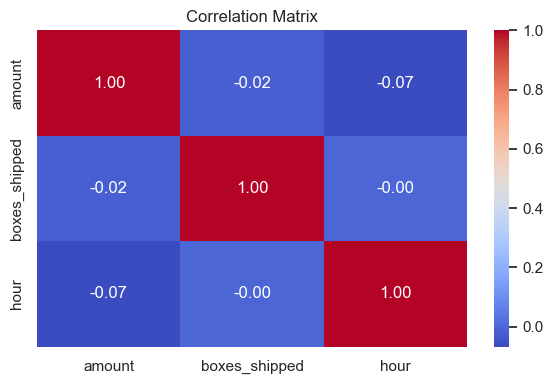

In [7]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "sample-data-10mins.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('data')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Simulate hour of day since dataset lacks timestamp
np.random.seed(0)
df['hour'] = np.random.randint(0, 24, df.shape[0])  # Random hour from 0 to 23

# Set seaborn style
sns.set(style="whitegrid")

# -------------------------------
# b. Fare Amount Distribution Plot
# -------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=40, kde=True, color='skyblue')
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ----------------------------------------
# c1. Fare Amount vs. Boxes Shipped (Volume)
# ----------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='boxes_shipped', y='amount')
plt.title("Fare Amount vs. Boxes Shipped")
plt.xlabel("Boxes Shipped")
plt.ylabel("Fare Amount")
plt.tight_layout()
plt.show()

# --------------------------------------
# c2. Fare Amount vs. Hour of the Day
# --------------------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='hour', y='amount')
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount")
plt.tight_layout()
plt.show()

# --------------------------------------
# c3. Correlation Matrix
# --------------------------------------
plt.figure(figsize=(6, 4))
corr_matrix = df[['amount', 'boxes_shipped', 'hour']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [8]:
# Import required libraries
import pandas as pd

# Load the original dataset
file_path = "sample-data-10mins.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('data')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# ----------------------------
# 3a. Create new analytical features
# ----------------------------

# Extract hour, day, and month
df['hour'] = df['date'].dt.hour         # If timestamp existed
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

# Simulate hour if missing (optional: remove if actual hour exists)
import numpy as np
np.random.seed(0)
df['hour'] = np.random.randint(0, 24, df.shape[0])

# Peak/Off-Peak indicator
df['peak_time'] = df['hour'].apply(lambda x: 'Peak' if (7 <= x <= 9) or (17 <= x <= 19) else 'Off-Peak')

# ----------------------------
# 3b. Encode categorical variables
# ----------------------------
categorical_cols = ['sales_person', 'country', 'product', 'day_of_week', 'peak_time']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# ----------------------------
# 3c. Save enhanced dataset
# ----------------------------
enhanced_file_path = "enhanced_sales_data.csv"
df.to_csv(enhanced_file_path, index=False)
print(f"Enhanced dataset saved to: {enhanced_file_path}")


Enhanced dataset saved to: enhanced_sales_data.csv
